###                                             Python Series (1-D array) and Dataframes (2-D array)

In [ ]:
# Create a dataframe having at least 3 columns and 50 rows to store numeric data generated using a random
# function. Replace 10% of the values by null values whose index positions are generated using random function.

# a. Identify and count missing values in a dataframe.
# b. Drop the column having more than 5 null values.
# c. Identify the row label having maximum of the sum of all values in a row and drop that row.
# d. Sort the dataframe on the basis of the first column.
# e. Remove all duplicates from the first column.
# f. Find the correlation between first and second column and covariance between second and third column
# g. Detect the outliers and remove the rows having outliers.
# h. Discretize second column and create 5 bins

In [8]:
import numpy as np
import pandas as pd
print(pd.Series([1,2,3,4]))
print(pd.Series([1,2,3,4],index=["r1","r2","r3","r4"]))

0    1
1    2
2    3
3    4
dtype: int64
r1    1
r2    2
r3    3
r4    4
dtype: int64


In [27]:
print(pd.Series({"a":1,"b":2,"c":3}))
print(pd.Series([[1,2,3],[4,5,6]])) ## series is a one dimension array

a    1
b    2
c    3
dtype: int64
0    [1, 2, 3]
1    [4, 5, 6]
dtype: object


In [6]:
## creating dataframe with dictionary of lists
data={"a":[10,20,30],"b":[100,200,300]}
df=pd.DataFrame(data)
print(df)

    a    b
0  10  100
1  20  200
2  30  300


In [9]:
## creating dataframe with list of lists
## giving column names and index names to dataframe
df1=pd.DataFrame([[1,2,3,4],[5,6,7,8],[9,10,11,12]],index=["row1","row2","row3"],columns=["col1","col2","col3","col4"])
print(df1)

      col1  col2  col3  col4
row1     1     2     3     4
row2     5     6     7     8
row3     9    10    11    12


In [12]:
## slicing of dataframe
## iloc function refers to integer location. syntax is [row range,column range] , upper limit is exclusive.
df1.iloc[0:1,0:2]  ## df1.iloc["row1":"row2","col1":"col3"] gives error

,col1,col2
row1,1.0,2.0


In [13]:
## subset of dataframes
## df.loc take names of rows and cols if given ,upper limit is inclusive
df1.loc["row2":"row3","col3":"col4"]                                          ## df1.loc[2:3,3:4] give error

,col3,col4
row2,7.0,8.0
row3,11.0,12.0


In [14]:
df1.loc[:,"col3":"col4"] ## include all rows

,col3,col4
row1,3.0,4.0
row2,7.0,8.0
row3,11.0,12.0
4,NaN,NaN


In [15]:
df1.loc["row2":"row3",:] ## include all columns

,col1,col2,col3,col4
row2,5.0,6.0,7.0,8.0
row3,9.0,10.0,11.0,12.0


In [17]:
## adding column to a dataframe
df1["col5"]=[2,7,90,89]
print(df1)

      col1  col2  col3  col4  col5
row1   1.0   2.0   3.0   4.0     2
row2   5.0   6.0   7.0   8.0     7
row3   9.0  10.0  11.0  12.0    90
4      NaN   NaN   NaN   NaN    89


In [18]:
## adding rows to a dataframe
df1.loc[4,:]=[100,200,300,400,500]
df1.loc["row4",:]=[100,200,300,400,500]
print(df1)

       col1   col2   col3   col4   col5
row1    1.0    2.0    3.0    4.0    2.0
row2    5.0    6.0    7.0    8.0    7.0
row3    9.0   10.0   11.0   12.0   90.0
4     100.0  200.0  300.0  400.0  500.0
row4  100.0  200.0  300.0  400.0  500.0


In [14]:
## find max from each column
print(df1.max())

col1    100.0
col2    200.0
col3    300.0
col4    400.0
col5    500.0
dtype: float64


In [15]:
## find max from each row
print(df1.max(axis=1))

row1      4.0
row2      8.0
row3     90.0
4       500.0
row4    500.0
dtype: float64


In [16]:
print(df1.mode(axis=1))

          0      1      2      3      4
row1    2.0    NaN    NaN    NaN    NaN
row2    7.0    NaN    NaN    NaN    NaN
row3    9.0   10.0   11.0   12.0   90.0
4     100.0  200.0  300.0  400.0  500.0
row4  100.0  200.0  300.0  400.0  500.0


In [17]:
print(df1.mode())

    col1   col2   col3   col4   col5
0  100.0  200.0  300.0  400.0  500.0


In [18]:
print(df1.mean(axis=1))

row1      2.4
row2      6.6
row3     26.4
4       300.0
row4    300.0
dtype: float64


In [19]:
print(df1.count()) ## it gives no of elements present in each column

col1    5
col2    5
col3    5
col4    5
col5    5
dtype: int64


In [20]:
print(df1.count(axis=1)) ## it gives no of elements present in each row

row1    5
row2    5
row3    5
4       5
row4    5
dtype: int64


In [21]:
print(pd.Series(np.arange(5),index=["a","b","c","d","e"]))  ## it take 0 to 5 but 5 is not included

a    0
b    1
c    2
d    3
e    4
dtype: int32


In [20]:
## drop a row from a dataframe
obj=df1.drop(4)
new_df=obj.drop("row2")
print(new_df)

       col1   col2   col3   col4   col5
row1    1.0    2.0    3.0    4.0    2.0
row3    9.0   10.0   11.0   12.0   90.0
row4  100.0  200.0  300.0  400.0  500.0


In [21]:
## drop a column from a dataframe
df2=new_df.drop("col3",axis=1)  ## note axis = 1 deletes column
print(df2)

       col1   col2   col4   col5
row1    1.0    2.0    4.0    2.0
row3    9.0   10.0   12.0   90.0
row4  100.0  200.0  400.0  500.0


In [22]:
## changing particular value of a dataframe
import math
import numpy as np
df2.iat[1,1]=np.NaN
df2.iat[2,3]=math.nan
df2.iat[0,0]=np.NaN
df2.iat[2,0]=np.NaN
df2.iat[0,3]=np.NaN
print(df2)

      col1   col2   col4  col5
row1   NaN    2.0    4.0   NaN
row3   9.0    NaN   12.0  90.0
row4   NaN  200.0  400.0   NaN


In [23]:
print(df2.isnull())

       col1   col2   col4   col5
row1   True  False  False   True
row3  False   True  False  False
row4   True  False  False   True


In [24]:
print(df2.isnull().sum()) ## true evaluates to 1 and false to 0 . so for col1 it is 1+0+1 = 2

col1    2
col2    1
col4    0
col5    2
dtype: int64


In [25]:
## evaluating total no of null values in a dataframe
print(df2.isnull().sum().sum())

5


In [28]:
print(df2.idxmax())  ## gives index of maximum element

col1    row3
col2    row4
col4    row4
col5     NaN
dtype: object


In [33]:
print(df2.idxmax(axis=1))   ## gives index of maximum element row-wise

row1    col4
row3    col5
row4    col5
dtype: object


In [36]:
## identify the row label having max of sum of all values in a row and drop that row.
mydf=pd.DataFrame([[10,20,30],[25,50,75],[11,22,33],[100,200,300]])
print(mydf)
print("row label : ",mydf.sum(axis=1).idxmax())
print(mydf.drop(mydf.sum(axis=1).idxmax()))

     0    1    2
0   10   20   30
1   25   50   75
2   11   22   33
3  100  200  300
row label :  3
    0   1   2
0  10  20  30
1  25  50  75
2  11  22  33


In [37]:
datafrm=pd.DataFrame([[6,2,6],[8,np.NaN,8],[np.NaN,np.NaN,9],[np.NaN,np.NaN,10],[np.NaN,np.NaN,11],[9,np.NaN,12],[10,np.NaN,13]])
print(datafrm)

      0    1   2
0   6.0  2.0   6
1   8.0  NaN   8
2   NaN  NaN   9
3   NaN  NaN  10
4   NaN  NaN  11
5   9.0  NaN  12
6  10.0  NaN  13


In [41]:
## deleting row on basis of null values

## how="any" will delete complete row if found any null value . (even 1 null value)
datafrm.dropna(axis=0,how="any",thresh=None)

,0,1,2
0,6.0,2.0,6


In [42]:
## how="all" will delete complete row if all values of a row is null.
datafrm.dropna(axis=0,how="all",thresh=None)

,0,1,2
0,6.0,2.0,6
1,8.0,NaN,8
2,NaN,NaN,9
3,NaN,NaN,10
4,NaN,NaN,11
5,9.0,NaN,12
6,10.0,NaN,13


In [43]:
## deleting column on basis of null values
datafrm.dropna(axis=1,how="any",thresh=None)

,2
0,6
1,8
2,9
3,10
4,11
5,12
6,13


In [45]:
## thresh -> it delete the rows or columns which contain less than minimum threshold of non null values.
## drop the column having more than 5 null values
length=len(datafrm) ## it gives no of rows present in dataframe. (total no of values in a column)
datafrm.dropna(axis=1,how="any",thresh=length-5)

,0,2
0,6.0,6
1,8.0,8
2,NaN,9
3,NaN,10
4,NaN,11
5,9.0,12
6,10.0,13


In [46]:
## drop the rows having more than 1 null  values .
no_of_cols=len(datafrm.columns)        ## it gives no of columns in dataframe
datafrm.dropna(axis=0,how="any",thresh=no_of_cols-1)

,0,1,2
0,6.0,2.0,6
1,8.0,NaN,8
5,9.0,NaN,12
6,10.0,NaN,13


### Question 3 : 

In [2]:
import numpy as np
import pandas as pd
dff=pd.DataFrame(np.random.randint(50,size=(50,3)))
print(dff)
rows=len(dff)
cols=len(dff.columns)
n=0.1*rows*cols
print("no of elements needs to be replaced by null values : ",n)
while n!=0 :
    i=np.random.randint(rows)
    j=np.random.randint(cols)
    if dff.iloc[i,j] != np.NaN :
        dff.iat[i,j]= np.NaN
        n=n-1
print("new dataframe: ")        
print(dff)     
print("Total no of null values in a dataframe: ",dff.isnull().sum().sum())
a=dff.sum(axis=1).idxmax()
print("row label having maximum of sum of all values in a row :" ,a)
print(dff.drop(a))


     0   1   2
0   38  16  27
1   25  28  25
2   35  37  29
3   16  48   2
4   25   0  11
5    4   1   5
6   45  29  22
7    4   6   4
8   17  12   9
9    1  23  36
10  13   8  25
11   1  20  12
12   3  21  37
13  36   5  11
14   9  19   5
15   4  18  30
16  47  24  24
17  34   1  45
18  16  45  35
19  21  22  43
20  10  23  43
21   4  31  33
22   9  20  45
23  41  48  16
24  48  19   9
25  11  31  18
26   3   3  31
27  46  29  33
28  12  31  41
29   3  18   7
30  48  16  47
31  45  22  14
32  41   2  44
33  19  23   5
34   4  34  42
35   0  33  45
36  19  49  23
37   8  40  34
38   2   2  46
39  40  40  42
40   8  16  10
41  31  12  35
42  20  21  48
43  39  10   2
44  14  23  28
45  34   9  44
46  38  34  12
47  26  48   2
48  16  28  39
49  45  43  20
no of elements needs to be replaced by null values :  15.0
new dataframe: 
       0     1     2
0   38.0  16.0  27.0
1   25.0  28.0  25.0
2   35.0  37.0  29.0
3   16.0  48.0   2.0
4   25.0   0.0  11.0
5    4.0   1.0   5.0
6   45.0  29.

In [71]:
unsorted_df=dff.sort_values(by=[0]) ## 0 means sorting on basis of first column
print(unsorted_df)

       0     1     2
21   0.0   NaN  20.0
42   3.0   8.0  33.0
23   5.0   2.0  14.0
24   7.0  36.0   8.0
2    7.0  21.0  44.0
34   7.0  26.0  20.0
36   9.0   7.0  23.0
10  10.0   3.0  43.0
22  10.0  21.0  16.0
12  12.0  48.0  41.0
27  13.0  31.0  26.0
26  13.0  42.0   NaN
48  14.0  37.0  19.0
20  16.0  43.0  12.0
0   17.0  18.0  44.0
19  18.0  41.0   NaN
46  18.0  28.0  31.0
13  18.0  41.0   0.0
28  19.0   NaN   NaN
41  20.0  15.0  38.0
5   22.0  43.0  44.0
3   23.0  32.0  21.0
38  24.0  25.0   6.0
17  25.0   8.0  15.0
8   25.0  28.0   1.0
25  25.0  32.0  12.0
6   25.0   6.0  19.0
39  25.0  16.0  36.0
1   27.0   0.0  45.0
33  28.0  38.0   7.0
37  29.0  27.0   7.0
35  30.0   7.0  10.0
16  31.0  19.0  17.0
9   32.0   4.0  37.0
45  36.0  29.0  42.0
14  36.0   NaN   NaN
11  38.0   9.0   7.0
49  40.0  46.0   NaN
44  42.0  33.0  13.0
4   43.0  49.0  12.0
30  43.0  22.0   7.0
40  45.0  12.0  21.0
32  46.0  23.0  22.0
31  49.0  38.0   9.0
7    NaN  43.0  14.0
15   NaN   NaN  47.0
18   NaN   3.

In [74]:
unsorted_df.sort_index(axis=1) ## it sorts indices of column

,0,1,2
21,0.0,NaN,20.0
42,3.0,8.0,33.0
23,5.0,2.0,14.0
24,7.0,36.0,8.0
2,7.0,21.0,44.0
34,7.0,26.0,20.0
36,9.0,7.0,23.0
10,10.0,3.0,43.0
22,10.0,21.0,16.0
12,12.0,48.0,41.0


In [75]:
unsorted_df.sort_index()  ## it sorts indices of rows

,0,1,2
0,17.0,18.0,44.0
1,27.0,0.0,45.0
2,7.0,21.0,44.0
3,23.0,32.0,21.0
4,43.0,49.0,12.0
5,22.0,43.0,44.0
6,25.0,6.0,19.0
7,NaN,43.0,14.0
8,25.0,28.0,1.0
9,32.0,4.0,37.0


In [76]:
unsorted_df.drop_duplicates(subset=0,keep="first") ## subset=0 means it removes duplicates from first column
## keep="first" will consider first value unique and other same values as duplicate
## keep="last" will consider last value unique and other same values as duplicate
## keep="false" will remove all duplicates values 

,0,1,2
21,0.0,NaN,20.0
42,3.0,8.0,33.0
23,5.0,2.0,14.0
24,7.0,36.0,8.0
36,9.0,7.0,23.0
10,10.0,3.0,43.0
12,12.0,48.0,41.0
27,13.0,31.0,26.0
48,14.0,37.0,19.0
20,16.0,43.0,12.0


In [79]:
unsorted_df.drop_duplicates(subset=0,keep="last")

,0,1,2
21,0.0,NaN,20.0
42,3.0,8.0,33.0
23,5.0,2.0,14.0
34,7.0,26.0,20.0
36,9.0,7.0,23.0
22,10.0,21.0,16.0
12,12.0,48.0,41.0
26,13.0,42.0,NaN
48,14.0,37.0,19.0
20,16.0,43.0,12.0


In [80]:
unsorted_df.drop_duplicates(subset=0,keep=False)

,0,1,2
21,0.0,NaN,20.0
42,3.0,8.0,33.0
23,5.0,2.0,14.0
36,9.0,7.0,23.0
12,12.0,48.0,41.0
48,14.0,37.0,19.0
20,16.0,43.0,12.0
0,17.0,18.0,44.0
28,19.0,NaN,NaN
41,20.0,15.0,38.0


In [81]:
unsorted_df[0].corr(unsorted_df[1])  ## -1 -> perfect negative correlation
                                     ## 0 -> no correlation
                                     ## +1 -> perfect positive correlation

0.09311714146701129

In [82]:
unsorted_df[0].cov(unsorted_df[1])

16.906097560975606

In [83]:
pd.cut(unsorted_df[1],5)  ## 5 is no of bins and 1 is column

21              NaN
42    (-0.049, 9.8]
23    (-0.049, 9.8]
24     (29.4, 39.2]
2      (19.6, 29.4]
34     (19.6, 29.4]
36    (-0.049, 9.8]
10    (-0.049, 9.8]
22     (19.6, 29.4]
12     (39.2, 49.0]
27     (29.4, 39.2]
26     (39.2, 49.0]
48     (29.4, 39.2]
20     (39.2, 49.0]
0       (9.8, 19.6]
19     (39.2, 49.0]
46     (19.6, 29.4]
13     (39.2, 49.0]
28              NaN
41      (9.8, 19.6]
5      (39.2, 49.0]
3      (29.4, 39.2]
38     (19.6, 29.4]
17    (-0.049, 9.8]
8      (19.6, 29.4]
25     (29.4, 39.2]
6     (-0.049, 9.8]
39      (9.8, 19.6]
1     (-0.049, 9.8]
33     (29.4, 39.2]
37     (19.6, 29.4]
35    (-0.049, 9.8]
16      (9.8, 19.6]
9     (-0.049, 9.8]
45     (19.6, 29.4]
14              NaN
11    (-0.049, 9.8]
49     (39.2, 49.0]
44     (29.4, 39.2]
4      (39.2, 49.0]
30     (19.6, 29.4]
40      (9.8, 19.6]
32     (19.6, 29.4]
31     (29.4, 39.2]
7      (39.2, 49.0]
15              NaN
18    (-0.049, 9.8]
29     (19.6, 29.4]
43     (29.4, 39.2]
47     (39.2, 49.0]


In [2]:
import pandas as pd
print(dff) 

       0     1     2
0    2.0  17.0  24.0
1    NaN   NaN   NaN
2   24.0   8.0  34.0
3   25.0  40.0  29.0
4   22.0   2.0  30.0
5   26.0  46.0  41.0
6   17.0  40.0   NaN
7    9.0  49.0  33.0
8   49.0   6.0  30.0
9   39.0  15.0  38.0
10  18.0  13.0   NaN
11   3.0  14.0  46.0
12  37.0   NaN  18.0
13   8.0   6.0  30.0
14  46.0   NaN  33.0
15  39.0  48.0  41.0
16   9.0  25.0   2.0
17  38.0   6.0  26.0
18  37.0  19.0  29.0
19   NaN   NaN  35.0
20  49.0   7.0  26.0
21  29.0  26.0  38.0
22  33.0  30.0  33.0
23  35.0  22.0  24.0
24  15.0  41.0  15.0
25  46.0  48.0  30.0
26  12.0  47.0  40.0
27  16.0   5.0  12.0
28   5.0   4.0  13.0
29  30.0   NaN  29.0
30  18.0  13.0   NaN
31  33.0   NaN   1.0
32  19.0  34.0  13.0
33   NaN  16.0   0.0
34  24.0  11.0  18.0
35  40.0  49.0   3.0
36  15.0  40.0  39.0
37  24.0  45.0  40.0
38  11.0  23.0  39.0
39  24.0  21.0  35.0
40  36.0  21.0  24.0
41  23.0  44.0  47.0
42   6.0  28.0  39.0
43  27.0  23.0   0.0
44  33.0  11.0  10.0
45   1.0  28.0  31.0
46  27.0  15.

In [15]:
row1 = dff.iloc[0]
row3= dff.iloc[2]
row1.cov(row3)

27.0

In [3]:
dff.describe()

,0,1,2
count,46.000000,44.000000,45.00000
mean,21.326087,22.613636,26.60000
std,15.408590,13.307134,14.75312
min,0.000000,0.000000,2.00000
25%,8.250000,15.000000,12.00000
50%,18.000000,22.000000,28.00000
75%,35.750000,31.000000,41.00000
max,48.000000,48.000000,48.00000


<AxesSubplot:ylabel='5'>

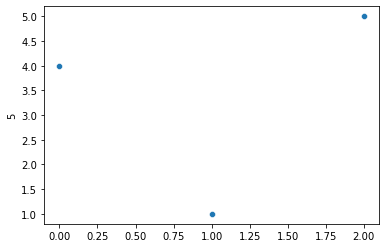

In [18]:
import seaborn as sns
r1 = dff.iloc[5]
sns.scatterplot(data = r1)